In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load dataset
df = pd.read_csv('/content/CIPLA.csv')

In [3]:
# Display first few rows
print(df.head())

         Date Symbol Series  Prev Close    Open     High      Low     Last  \
0  2000-01-03  CIPLA     EQ     1349.40  1410.0  1457.35  1380.05  1457.35   
1  2000-01-04  CIPLA     EQ     1457.35  1537.0  1537.00  1430.00  1466.05   
2  2000-01-05  CIPLA     EQ     1465.25  1474.0  1474.00  1365.00  1441.00   
3  2000-01-06  CIPLA     EQ     1435.05  1434.0  1435.00  1349.00  1365.00   
4  2000-01-07  CIPLA     EQ     1355.85  1370.0  1389.90  1247.40  1247.40   

     Close     VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  1457.35  1441.36   21060  3.035496e+12     NaN                 NaN   
1  1465.25  1460.43   30215  4.412698e+12     NaN                 NaN   
2  1435.05  1428.11   33799  4.826872e+12     NaN                 NaN   
3  1355.85  1390.55   33083  4.600356e+12     NaN                 NaN   
4  1247.55  1267.49   66536  8.433351e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4      

In [4]:
# Display basic statistics
print(df.describe())

        Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean    540.503798   541.457755   549.587693   532.143583   540.472588   
std     289.319810   289.955959   295.087710   283.868905   289.158087   
min     160.100000   150.550000   169.450000   145.000000   152.000000   
25%     309.025000   309.962500   312.750000   305.350000   309.000000   
50%     473.850000   474.625000   479.950000   468.875000   473.525000   
75%     681.937500   683.225000   691.787500   671.675000   681.937500   
max    1465.250000  1537.000000  1537.000000  1430.000000  1466.050000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean    540.421052   540.931589  1.550071e+06  7.841696e+13   44967.250407   
std     289.151156   289.411215  2.317962e+06  1.620908e+14   43776.047324   
min     160.100000   

In [5]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [7]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,CIPLA,EQ,935.6,935.60,940.0,902.15,907.95,905.40,914.11,10255697,9.374885e+14,161321.0,3451318.0,0.3365
5302,2021-04-27,CIPLA,EQ,905.4,913.00,919.5,901.00,911.20,912.40,909.22,5669049,5.154420e+14,120188.0,1126288.0,0.1987
5303,2021-04-28,CIPLA,EQ,912.4,914.35,918.0,902.95,906.25,910.20,909.94,7251009,6.597970e+14,134413.0,1772739.0,0.2445
5304,2021-04-29,CIPLA,EQ,910.2,911.95,917.4,904.00,906.00,906.50,910.22,4953091,4.508421e+14,88604.0,1122534.0,0.2266
5305,2021-04-30,CIPLA,EQ,906.5,900.75,921.0,900.75,910.00,910.35,911.47,6459737,5.887824e+14,121466.0,2004555.0,0.3103


In [8]:
df.shape

(5306, 15)

**Step 2: Exploratory Data Analysis (EDA)**

In [9]:
# Check for missing values
print(df.isnull().sum())

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64


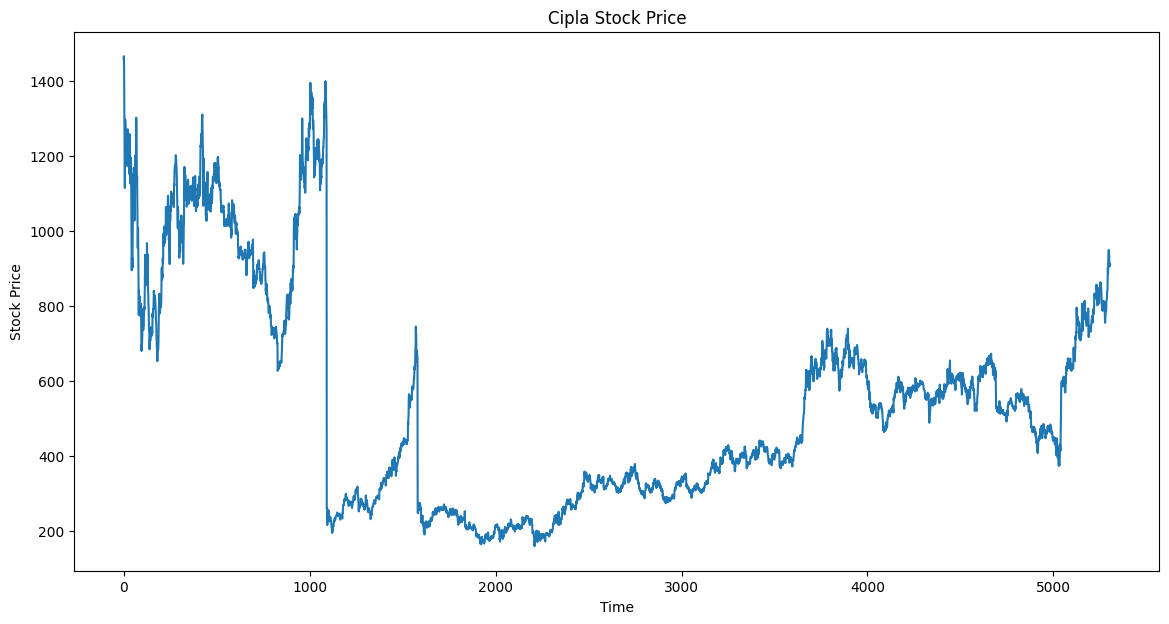

In [10]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Cipla Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [12]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [13]:
# Feature selection and scaling
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

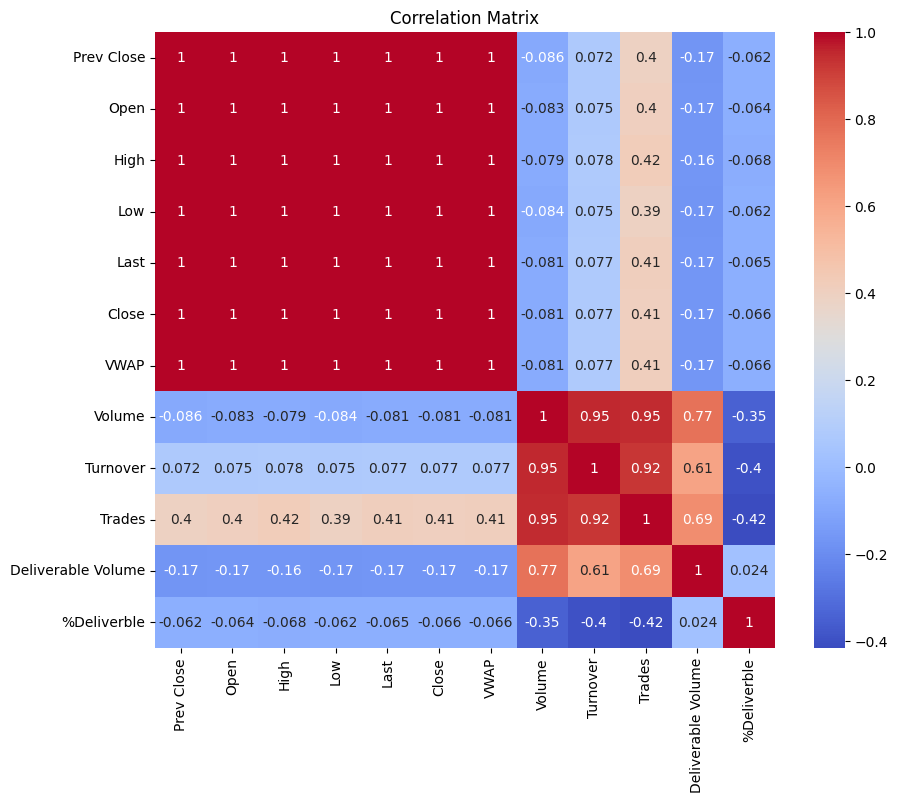

In [15]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

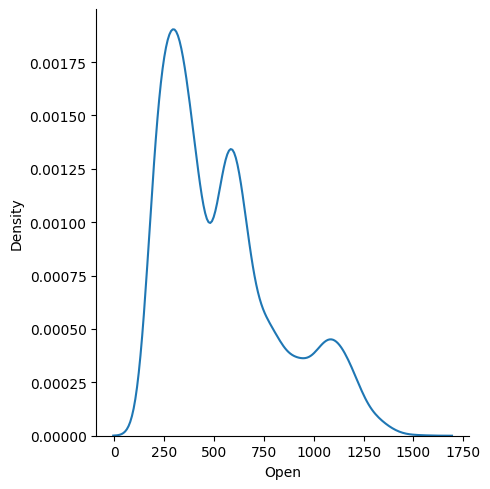

In [16]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Prev Close', ylabel='High'>

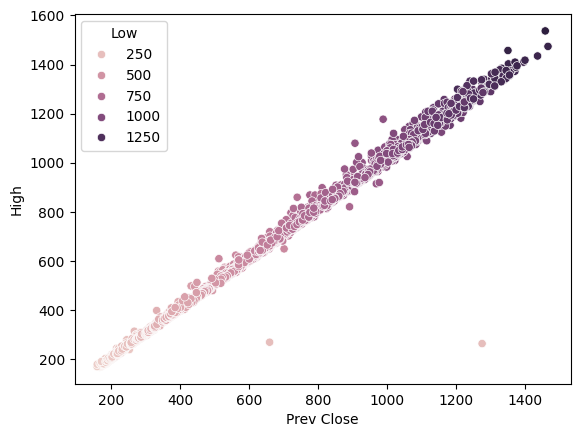

In [18]:
# About The Adj Close , High and low Stock prices
sns.scatterplot(x="Prev Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Prev Close'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Last'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'VWAP'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Turnover'}>],
       [<Axes: title={'center': 'Trades'}>,
        <Axes: title={'center': 'Deliverable Volume'}>,
        <Axes: title={'center': '%Deliverble'}>]], dtype=object)

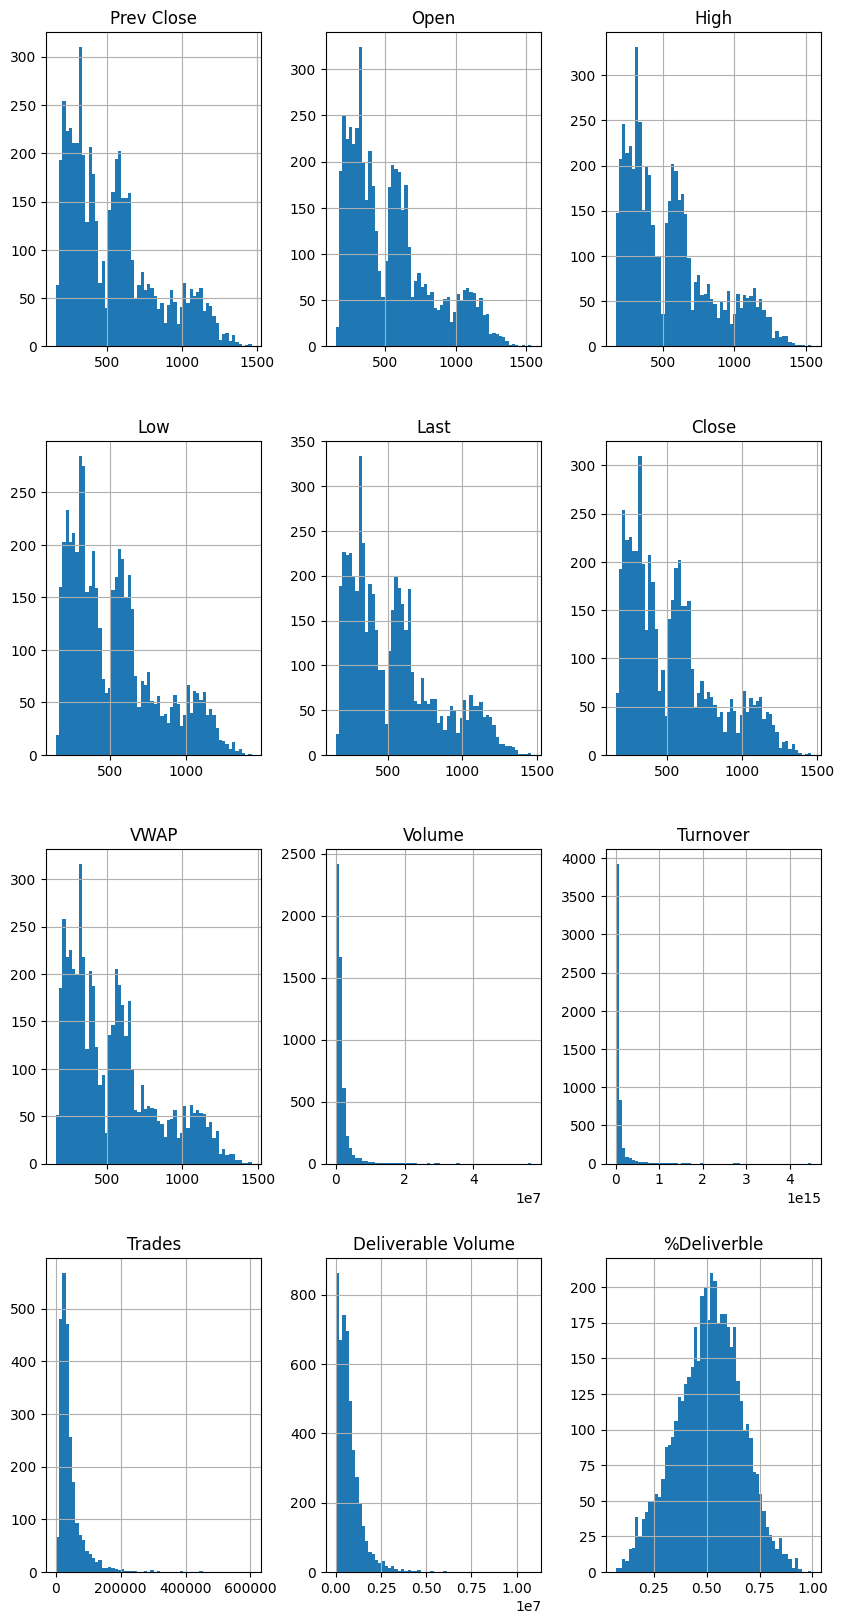

In [19]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

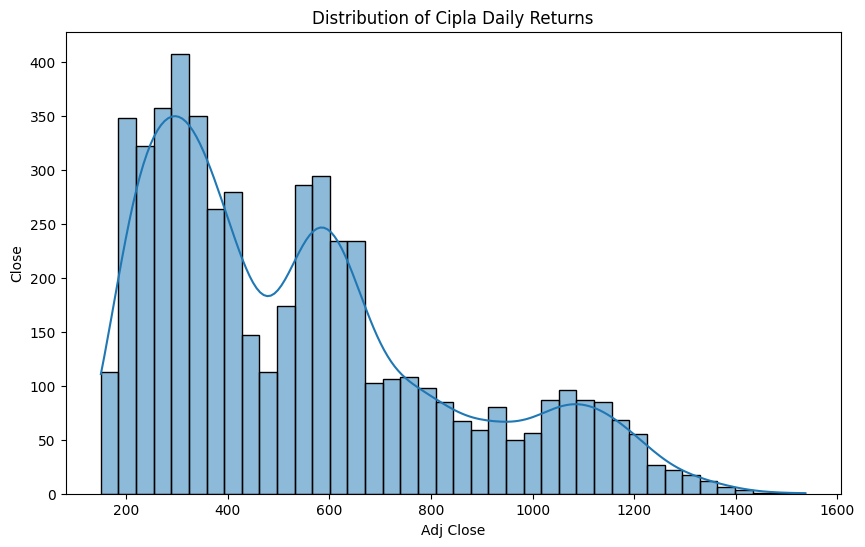

In [20]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of Cipla Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

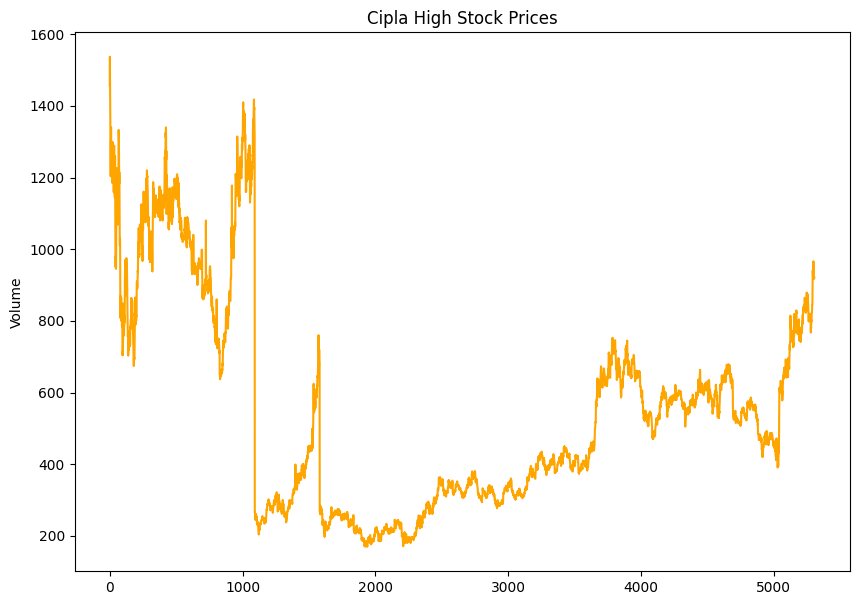

In [21]:
# Plot Cipla High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='Cipla '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

volume_analysis(df,'High')

In [22]:
import tensorflow as tf
print(tf.__version__)

2.15.0


**Step 3: Data Preprocessing and split the dataset into training and testing sets**

In [23]:
# Converting the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sorting the dataframe by date
df = df.sort_values('Date')

In [24]:
# Setting the date as the index
df.set_index('Date', inplace=True)

# Feature and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [25]:
# Scaling the features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [26]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

**Step 4: Comparing and Predicting with differnt Models**

**LSTM Model**

In [27]:
# Reshape data for LSTM [samples, time steps, features]
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [28]:
# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train.shape[1])))
model.add(LSTM(units=50))
model.add(Dense(1))

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_lstm, y_train, epochs=50, batch_size=32)

Epoch 1/50
133/133 [==============================] - 5s 5ms/step - loss: 0.0188
Epoch 2/50
133/133 [==============================] - 1s 5ms/step - loss: 1.6760e-04
Epoch 3/50
133/133 [==============================] - 1s 4ms/step - loss: 1.0317e-04
Epoch 4/50
133/133 [==============================] - 1s 5ms/step - loss: 9.5648e-05
Epoch 5/50
133/133 [==============================] - 1s 4ms/step - loss: 8.8493e-05
Epoch 6/50
133/133 [==============================] - 1s 5ms/step - loss: 8.0524e-05
Epoch 7/50
133/133 [==============================] - 1s 5ms/step - loss: 7.6703e-05
Epoch 8/50
133/133 [==============================] - 1s 11ms/step - loss: 6.7750e-05
Epoch 9/50
133/133 [==============================] - 1s 11ms/step - loss: 6.1312e-05
Epoch 10/50
133/133 [==============================] - 1s 11ms/step - loss: 5.5890e-05
Epoch 11/50
133/133 [==============================] - 1s 10ms/step - loss: 5.3614e-05
Epoch 12/50
133/133 [==============================] - 1s 8ms/s

In [30]:
# Predictions
y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm)

34/34 [==============================] - 1s 2ms/step


In [31]:
# Evaluation
rmse_lstm = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), y_pred_lstm))
r2_lstm = r2_score(scaler_y.inverse_transform(y_test), y_pred_lstm)
print(f'LSTM RMSE: {rmse_lstm}, R2: {r2_lstm}')

LSTM RMSE: 10.972704058882263, R2: 0.9985736581033161


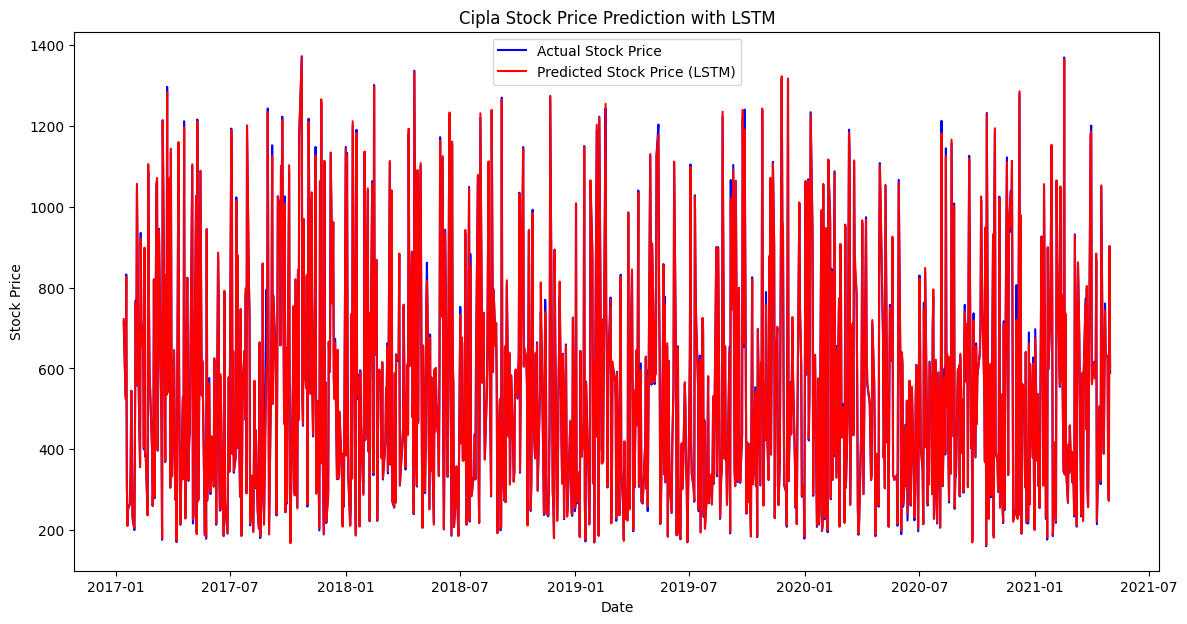

In [47]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], scaler_y.inverse_transform(y_test), color='blue', label='Actual Stock Price')
plt.plot(df.index[-len(y_test):], y_pred_lstm, color='red', label='Predicted Stock Price (LSTM)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Cipla Stock Price Prediction with LSTM')
plt.legend()
plt.show()

**SVM Model**

In [32]:
# SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train.ravel())

SVR()

In [33]:
# Predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_svm = scaler_y.inverse_transform(y_pred_svm.reshape(-1, 1))

In [34]:
# Evaluation
rmse_svm = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), y_pred_svm))
r2_svm = r2_score(scaler_y.inverse_transform(y_test), y_pred_svm)
print(f'SVM RMSE: {rmse_svm}, R2: {r2_svm}')

SVM RMSE: 53.377230334385615, R2: 0.9662473110518063


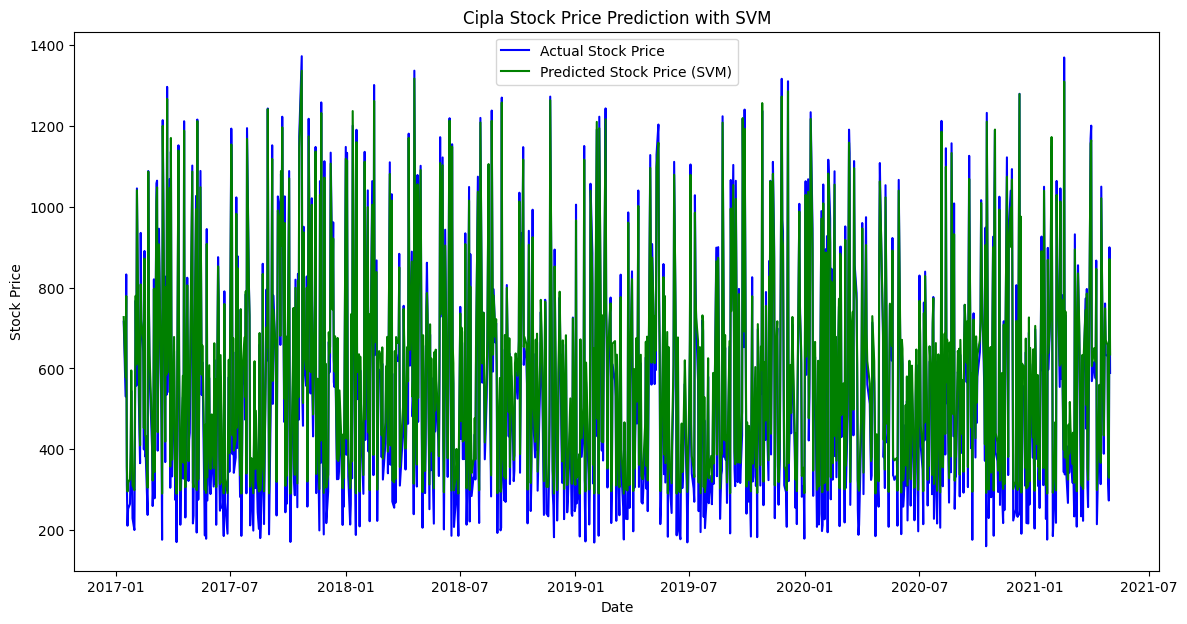

In [48]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], scaler_y.inverse_transform(y_test), color='blue', label='Actual Stock Price')
plt.plot(df.index[-len(y_test):], y_pred_svm, color='green', label='Predicted Stock Price (SVM)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Cipla Stock Price Prediction with SVM')
plt.legend()
plt.show()

**SVR Model**

In [35]:
# SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train.ravel())

SVR()

In [36]:
# Predictions
y_pred_svr = svr_model.predict(X_test)
y_pred_svr = scaler_y.inverse_transform(y_pred_svr.reshape(-1, 1))

In [37]:
# Evaluation
rmse_svr = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), y_pred_svr))
r2_svr = r2_score(scaler_y.inverse_transform(y_test), y_pred_svr)
print(f'SVR RMSE: {rmse_svr}, R2: {r2_svr}')

SVR RMSE: 53.377230334385615, R2: 0.9662473110518063


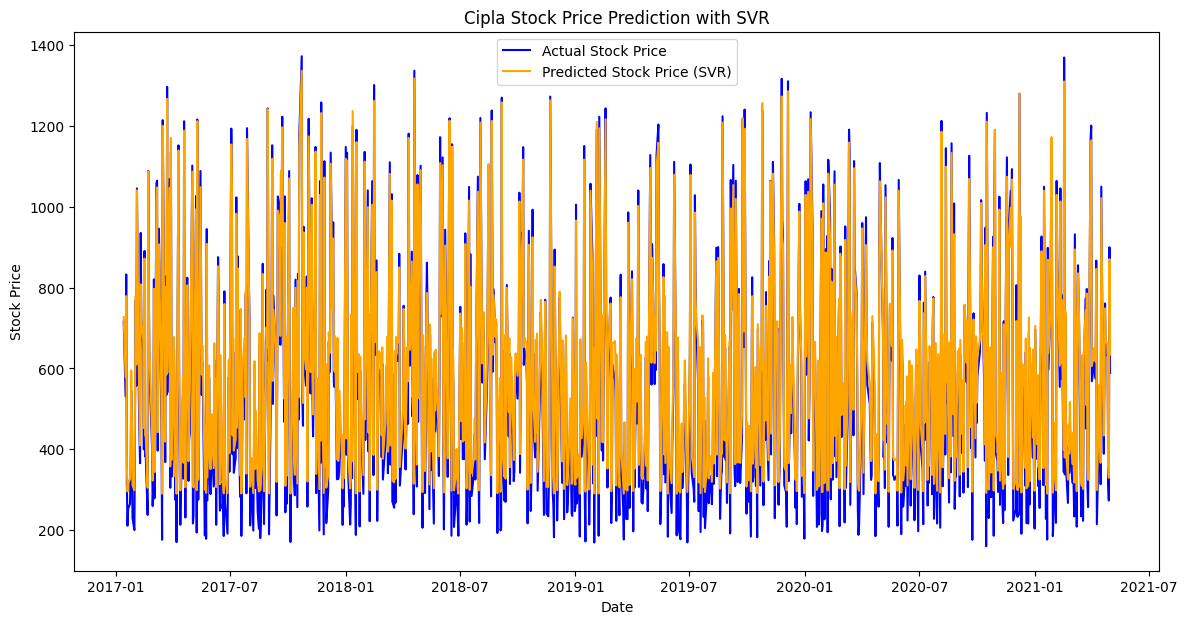

In [49]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], scaler_y.inverse_transform(y_test), color='blue', label='Actual Stock Price')
plt.plot(df.index[-len(y_test):], y_pred_svr, color='orange', label='Predicted Stock Price (SVR)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Cipla Stock Price Prediction with SVR')
plt.legend()
plt.show()

**KNN Model**

In [38]:
# KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train.ravel())

KNeighborsRegressor()

In [39]:
# Predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_knn = scaler_y.inverse_transform(y_pred_knn.reshape(-1, 1))

In [40]:
# Evaluation
rmse_knn = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), y_pred_knn))
r2_knn = r2_score(scaler_y.inverse_transform(y_test), y_pred_knn)
print(f'KNN RMSE: {rmse_knn}, R2: {r2_knn}')

KNN RMSE: 10.934898511709815, R2: 0.9985834698581669


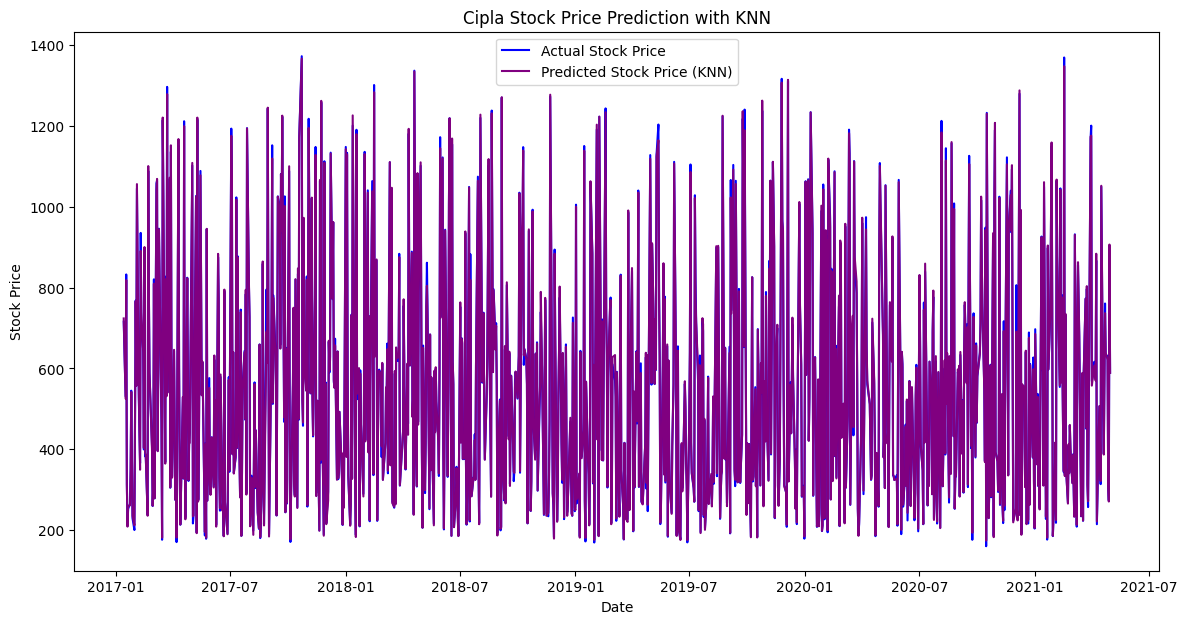

In [50]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], scaler_y.inverse_transform(y_test), color='blue', label='Actual Stock Price')
plt.plot(df.index[-len(y_test):], y_pred_knn, color='purple', label='Predicted Stock Price (KNN)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Cipla Stock Price Prediction with KNN')
plt.legend()
plt.show()

**K-Means Clustering**

In [41]:
from sklearn.cluster import KMeans

In [45]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# KMeans clustering
kmeans = KMeans(n_clusters=3)

# Select only numerical columns for clustering
numerical_df = df.select_dtypes(include=['number'])

# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
numerical_df_imputed = imputer.fit_transform(numerical_df) # Fit and transform the data

# Fit kmeans on the imputed numerical data
kmeans.fit(numerical_df_imputed)

# Adding cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


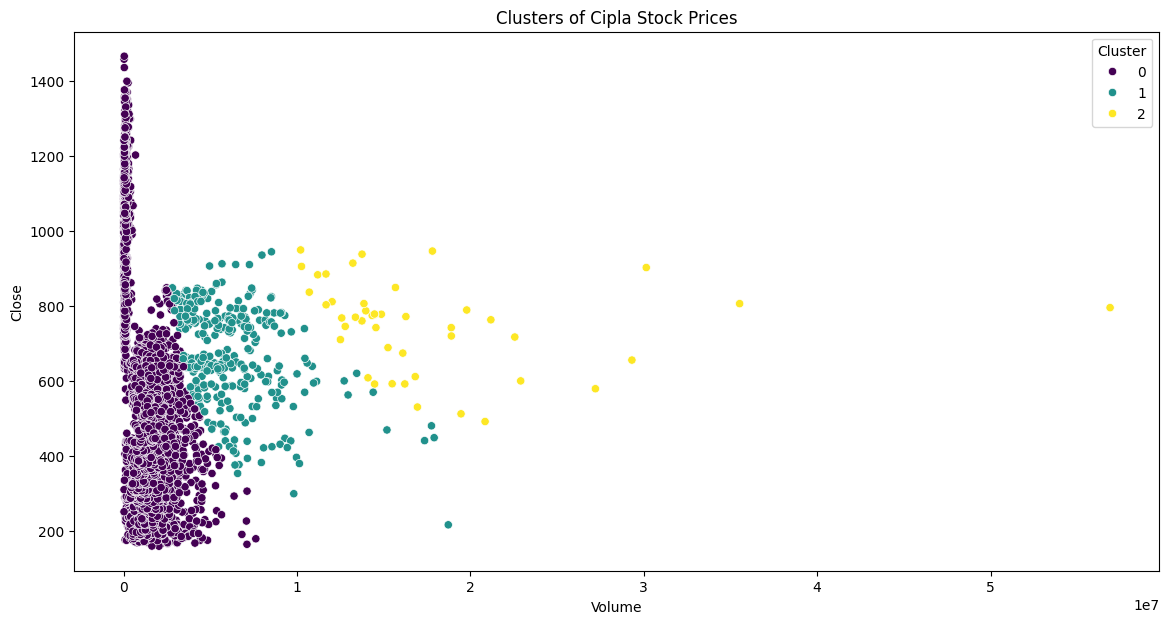

In [46]:
# Visualizing clusters
plt.figure(figsize=(14, 7))
sns.scatterplot(x=df['Volume'], y=df['Close'], hue=df['Cluster'], palette='viridis')
plt.title('Clusters of Cipla Stock Prices')
plt.show()